# MNIST DATASET PROJECT

Sean Moylan
<br>
G00299424

## References
https://www.youtube.com/watch?v=wQ8BIBpya2k&t=1004s<br>
https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb<br>
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/<br>

***

To get started I downloaded the MNIST dataset from http://yann.lecun.com/exdb/mnist/
<br>
I first unziped the files into the /data directory to avoid using a library to extract from within this Notebook
<br>
The Nural network is going to be made up of the input layer, 2 hidden layers followed by an output layer using a sigmoid function to determine the data.

The MNIST dataset consists of training and testing images that are 28 X 28 pixels<br>


![alt text](neuralnetwork.png "Neural Network")

# Retrieving MNIST Dataset

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# I found a useful way to import the dataset straight from tensorflow as follows
mnistData = tf.keras.datasets.mnist;

Using TensorFlow backend.


## Unpack, view and Normalize the data

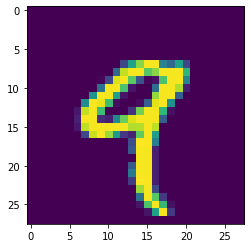

In [16]:
# Unpack the dataset, using this method of data retrieval we save on over complicating when reading it in
# This will give us 4 sets of data in bytes. x_train, y_train, x_test and y_test
(x_train, y_train), (x_test, y_test) = mnistData.load_data()

# To display an image we can use matplot to help
plt.imshow(x_train[4])
plt.show()

In [17]:
# Display the shape of the data
print('Train', x_train.shape, y_train.shape)
print('Train', x_test.shape, y_test.shape)

Train (60000, 28, 28) (60000,)
Train (10000, 28, 28) (10000,)


In [18]:
# summarize pixel values
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


In [19]:
# used for scaling pixel data between 0-1
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [20]:
# prepare an iterators to scale images
train_iterator = datagen.flow(x_train, y_train, batch_size=64)
test_iterator = datagen.flow(x_test, y_test, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (60000, 28, 28))

In [23]:
# Now we can normalise the data

#y_train = tf.keras.utils.normalize(y_train)
#x_train = tf.keras.utils.normalize(x_train)



## Building the model

In [24]:
model = tf.keras.models.Sequential()

In [25]:
# 1st Layer is the input layer
model.add(tf.keras.layers.Flatten())

# Rectified linear function is used as it is the default, can be changed later to test for better results
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Outputlayer will have the same amount of nurons as there are numbers for output so 10
# Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [26]:
# Model does not optimize accurecy but instead tries to minimise the loss

# Adam optimizer with categorical crossentropy, 
#model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Same but with Stochastic gradient descent optimizer
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])



In [ ]:
# Here we set the Epochs = 10 which means we pass the training set through the network 10 times
# This will give the model greater accuracy 
model.fit(x_train, y_train, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/sample - loss: 528168561.9002 - accuracy: 0.0000e+00
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 1518281956.4544 - accuracy: 0.0000e+00
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 1135784296.0043 - accuracy: 0.0025
Epoch 4/20
 6368/60000 [==>...........................] - ETA: 3s - loss: 840542803.9397 - accuracy: 0.0151

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

In [ ]:
model.save('Stochastic gradient descent model (100% accuracy)')

In [ ]:
my_model = tf.keras.models.load_model('Adam MNIST model with 20 epochs (98.4% Accuracy)')

In [5]:
# Make a Prediction based on the model
predictions = my_model.predict([x_test])

# save model to json format
model_json = my_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'x_test' is not defined

In [16]:
import numpy as np

print(np.argmax(predictions[15]))

5


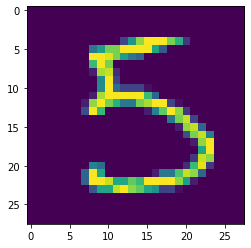

In [17]:
plt.imshow(x_test[15])
plt.show()